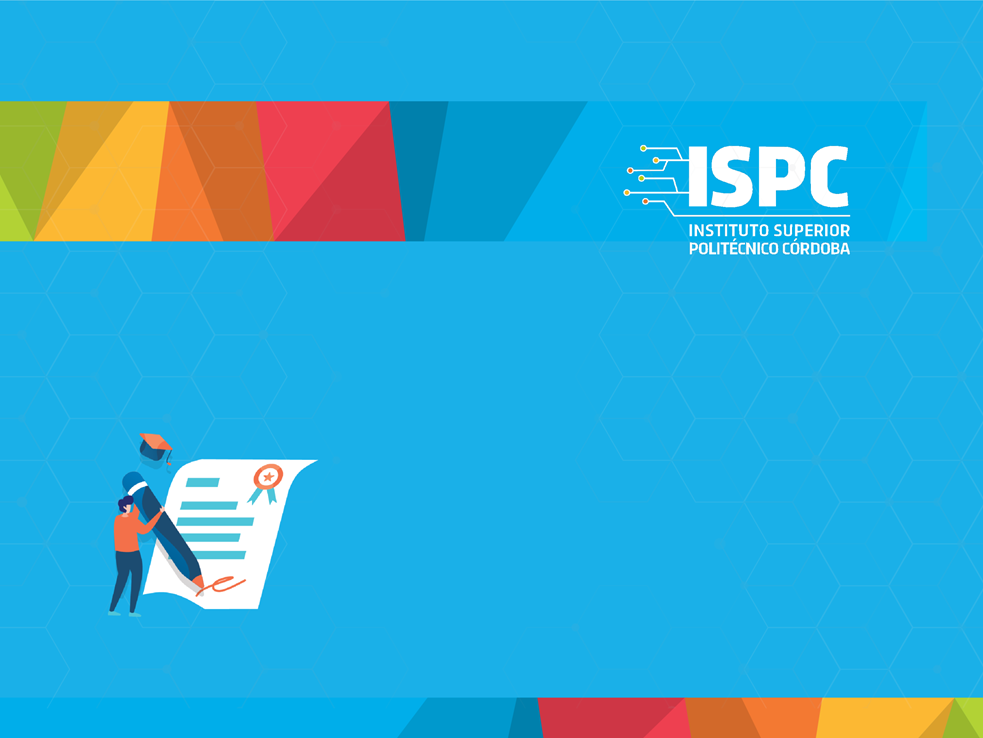

# Árbol de decisión - Tree Desicion

https://python-course.eu/machine-learning/decision-trees-in-python.php


Los árboles de decisión son algoritmos de aprendizaje supervisado que se utilizan tanto para tareas de clasificación como de regresión, en las que nos concentraremos en la clasificación en esta primera parte de nuestro tutorial sobre árboles de decisión.

Los árboles de decisión se asignan a los algoritmos de aprendizaje basados ​​en información que utilizan diferentes medidas de ganancia de información para el aprendizaje. Podemos usar árboles de decisión para problemas en los que tenemos entradas continuas pero también categóricas y características objetivo.



La idea principal de los árboles de decisión es encontrar aquellas características descriptivas que contienen la mayor cantidad de "información" con respecto a la característica de destino y luego dividir el conjunto de datos a lo largo de los valores de estas características de modo que los valores de la característica de destino para los subconjuntos de datos resultantes sean lo más puros posible. -> Se dice que la característica descriptiva que deja la característica objetivo de forma más pura es la más informativa. Este proceso de encontrar la función "más informativa" se lleva a cabo hasta que cumplimos con un criterio de parada donde finalmente terminamos en los llamados nodos hoja.

Los nodos hoja contienen las predicciones que haremos para las nuevas instancias de consulta presentadas a nuestro modelo entrenado. Esto es posible ya que el modelo ha aprendido la estructura subyacente de los datos de entrenamiento y, por lo tanto, puede, dadas algunas suposiciones, hacer predicciones sobre el valor de la característica de destino (clase) de las instancias de consulta no vistas.

Un árbol de decisión contiene principalmente un nodo raíz, nodos interiores y nodos hoja que luego se conectan mediante ramas. 

https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

Los árboles de decisión se subdividen aún más si la característica de destino se escala continuamente, como por ejemplo, los precios de la vivienda o se escala categóricamente, como por ejemplo, las especies animales. 

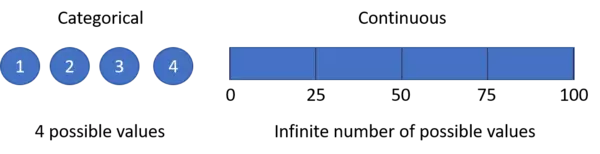

En términos simplificados, el proceso de entrenar un árbol de decisión y predecir las características de destino de las instancias de consulta es el siguiente:

1. Presentar un conjunto de datos que contenga varias instancias caracterizadas por una serie de características descriptivas y una característica objetivo.

2. Entrene el modelo de árbol de decisión dividiendo continuamente la característica objetivo a lo largo de los valores de las características descriptivas usando una medida de ganancia de información durante el proceso de capacitación

3. Haga crecer el árbol hasta que cumplamos un criterio de parada --> cree nodos hoja que representen las predicciones que queremos hacer para nuevas instancias de consulta

4. Muestre las instancias de consulta del árbol y recorra el árbol hasta que lleguemos a los nodos hoja.

5. Felicitaciones, ha encontrado las respuestas a sus preguntas. 

Entonces, los árboles de decisión se pueden utilizar para:

predecir la característica de destino de una instancia de consulta desconocida mediante la creación de un modelo basado en datos existentes para los que se conocen los valores de la característica de destino (aprendizaje supervisado). 

Además, sabemos que este modelo puede hacer predicciones para instancias de consulta desconocidas porque modela la relación entre las características descriptivas conocidas y la característica de destino conocida. 

En nuestro siguiente ejemplo, el modelo de árbol aprende "cómo se ve una especie animal específica", respectivamente, la combinación de valores de características descriptivas distintivas de las especies animales.
Sabemos que para entrenar un modelo de árbol de decisión necesitamos un conjunto de datos que consta de varios ejemplos de entrenamiento caracterizados por una serie de características descriptivas y una característica objetivo.

Veamos un ejemplo, los animales se clasifican como mamíferos o reptiles en función de si tienen dientes, tienen patas y respiran. El conjunto de datos se parece a: 

In [1]:
import pandas as pd

data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])

features = data[["toothed","hair","breathes","legs"]]
target = data["species"]

data

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


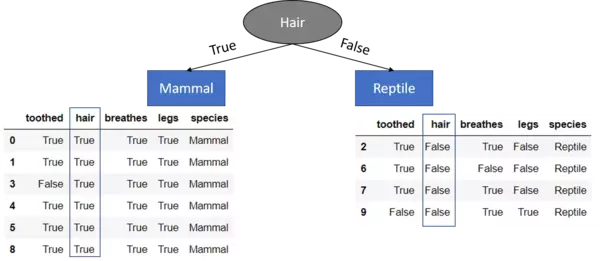

Es decir, hemos dividido nuestro conjunto de datos preguntando si el animal tiene pelo o no. Y exactamente este preguntar y con ello dividir es la clave de los modelos de árboles de decisión. Ahora, en ese caso, la división ha sido muy fácil porque solo tenemos una pequeña cantidad de características descriptivas y el conjunto de datos es completamente separable a lo largo de los valores de una sola característica descriptiva. Sin embargo, la mayoría de las veces, los conjuntos de datos no son tan fáciles de separar y debemos dividir el conjunto de datos más de una vez ("hacer más de una pregunta").

Aquí surge directamente la siguiente pregunta: Dado que tenemos que dividir el conjunto de datos más de una vez, es decir, hacer más de una pregunta para separar el conjunto de datos, 

¿Cuál es la característica descriptiva con la que debemos comenzar (nodo raíz) 

¿En qué orden debemos hacer preguntas (construir los nodos interiores), es decir, usar características descriptivas para dividir el conjunto de datos? 

Bueno, hemos visto que el uso de la función descriptiva del cabello parece ocupar la mayor parte de la información sobre la función de destino, ya que solo necesitamos esta función para dividir perfectamente el conjunto de datos. Por lo tanto, sería útil medir la "información" de las características y usar la característica con la mayor "información" como la característica que debería usarse para dividir los datos. De ahora en adelante, usaremos el término ganancia de información como una medida de "informatividad" de una característica. En la siguiente sección, presentaremos algunos términos matemáticos y deduciremos cómo se calcula la ganancia de información y cómo podemos construir un modelo de árbol basado en eso.

## Matemática de los arboles de desición

Presentamos la ganancia de información como una medida de qué tan buena es una característica descriptiva adecuada para dividir un conjunto de datos. Para poder calcular la ganancia de información, primero debemos introducir el término entropía de un conjunto de datos. 

La entropía de un conjunto de datos se utiliza para medir la impureza de un conjunto de datos y utilizaremos este tipo de medida informativa en nuestros cálculos. 

También existen otros tipos de medidas que se pueden utilizar para calcular la ganancia de información. Los más destacados son: Índice de Gini, Chi-Cuadrado, Relación de ganancia de información, Varianza. El término entropía (en la teoría de la información) se remonta a Claude E. Shannon.

La idea detrás de la entropía es, en términos simplificados, la siguiente: imagina que tienes una rueda de lotería que incluye 100 bolas verdes. Se puede decir que el conjunto de bolas dentro de la rueda de lotería es totalmente puro porque solo se incluyen bolas verdes. Para expresar esto en la terminología de la entropía, este conjunto de bolas tiene una entropía de 0 (también podemos decir impureza cero). Considere ahora, 30 de estas bolas se reemplazan por bolas rojas y 20 por bolas azules.

Conjuntos de datos puros e impuros

Si ahora saca otra bola de la rueda de la lotería, la probabilidad de recibir una bola verde se reduce de 1,0 a 0,5. Dado que la impureza aumentó, la pureza disminuyó, por lo que también aumentó la entropía. 

Por lo tanto, podemos decir que cuanto más "impuro" sea un conjunto de datos, mayor será la entropía y cuanto menos "impuro" sea un conjunto de datos, menor será la entropía. 

El modelo de entropía de Shannon utiliza la función logarítmica $log_2P(x)$ para medir la entropía y, por tanto, la impureza de un conjunto de datos, ya que cuanto mayor es la probabilidad de obtener un resultado específico == P(x) (dibujar una bola verde al azar), más se acerca al logaritmo binario 1.

Una vez que un conjunto de datos contiene más de un "tipo" de elementos, específicamente más de un valor de característica de destino, la impureza será mayor que cero. Con ello también la entropía del conjunto de datos será mayor que cero. Por lo tanto, es útil sumar las entropías de cada valor de característica objetivo posible y ponderarlo por la probabilidad de que alcancemos estos valores suponiendo que extraigamos valores aleatoriamente del espacio de valores de característica objetivo (¿Cuál es la probabilidad de dibujar una bola verde con solo probabilidad?Exacto, 0,5 y con ello hay que ponderar la entropía calculada para las bolas verdes con 0,5). Esto finalmente conduce a la definición formal de la entropía de Shannon, que sirve como base para el cálculo de la ganancia de información: 

$$ H(x) = - \sum_{(for k \in x)} P(x=k)log_2P(x=k)$$

donde decimos que P(x=k) es la probabilidad de que la característica objetivo tome un valor k específico. Por lo tanto, aplicando esta fórmula a nuestro ejemplo con las tres bolas de colores, obtenemos:

Green balls: $ H(x = green) = 0.5 log_2(0.5) = -0.5 $

Blue balls: $ H(x = blue) = 0.2 log_2(0.2) = -0.464 $

Red balls: $ H(x = red) = 0.5 log_2(0.5) = -0.521 $

$$ H(x) = -((-0.5) + (-0.464) + (-0.521))= 1.485 $$ 

Apliquemos este enfoque a nuestro conjunto de datos original donde queremos predecir las especies animales. Nuestro conjunto de datos tiene dos valores de características de destino en su espacio de valores de características de destino {Mamífero, Reptil}. Dónde $P(x=Mammal)=0.6$ y $P(x=Reptile)=0.4$. Por lo tanto, la entropía de nuestro conjunto de datos con respecto a la característica de destino se calcula con:

$$ H(x) = -((0.6+log_2(0.6) + (0.4log_2(0.4)) = 0.971 $$





Ahora hemos determinado la impureza/pureza total ($\approx$entropía) de nuestro conjunto de datos, que equivale aproximadamente a 0.971. Ahora nuestra tarea es encontrar la mejor función en términos de ganancia de información (recuerde que queremos encontrar la función que divida los datos de manera más precisa a lo largo de los valores de la función de destino) que debemos usar para dividir primero nuestros datos (que sirve como raíz). nodo). Recuerde que la función de cabello ya no forma parte de nuestro conjunto de funciones.
Después de esto, ¿cómo podemos verificar cuál de las características descriptivas divide con mayor precisión el conjunto de datos, es decir, sigue siendo el conjunto de datos con la entropía de impureza más baja o, en otras palabras, clasifica mejor las características objetivo por sí mismo? Bueno, usamos cada característica descriptiva y dividimos el conjunto de datos a lo largo de los valores de estas características descriptivas y luego calculamos la entropía del conjunto de datos una vez que hemos dividido los datos a lo largo de los valores de las características.

Esto nos da la entropía restante después de haber dividido el conjunto de datos a lo largo de los valores de las características. A continuación, restamos este valor de la entropía calculada originalmente del conjunto de datos para ver cuánto reduce la entropía original esta división de características. La ganancia de información de una característica se calcula con: $$ InfoGain(feacture_d) = Entropia(D) - Entropia(feature_d)$$

Entonces, lo único que tenemos que hacer es dividir el conjunto de datos a lo largo de los valores de cada característica y luego tratar estos subconjuntos como si fueran nuestro conjunto de datos "original" en términos de cálculo de entropía. La fórmula para el cálculo de la ganancia de información por característica es:

$$ InfoGain(feacture_d) = Entropia(D) - \sum_{t \in{feature_d}}{\frac{\left\lvert{feature_d}\right\rvert}{\left\lvert{D}\right\rvert}} * -(\sum_{k \in{feature_d}}{P(target=k, feature_d=t)log_2(P(target=k, feature_d=t))} $$

En resumen, para cada característica descriptiva, sumamos las entropías resultantes para dividir el conjunto de datos a lo largo de los valores de las características y, además, ponderamos las entropías de los valores de las características por su probabilidad de ocurrencia.
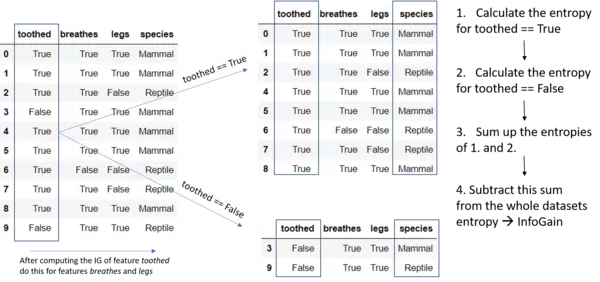


Ahora calcularemos la ganancia de información para cada característica descriptiva:

Tiene dientes:

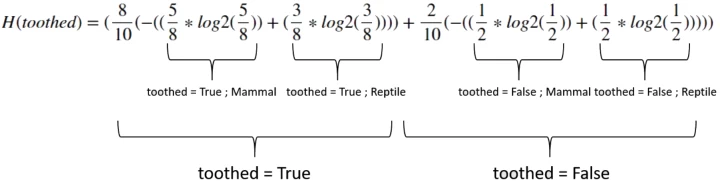



$=0.963547$

$InfoGain(toothed) = 0.971 - 0.963547 =0.00745$

breathes:

$H(breathes)= (\frac{9}{10}*-((\frac{6}{9}*log_2(\frac{6}{9}))+(\frac{3}{9}*log_2(\frac{3}{9})))+\frac{1}{10}*-((0)+(1*log_2(1))))= 0.82647 $

$InfoGain(breathes) = 0.971 - 0.82647 = 0.1445$

legs:

$H(legs)= \frac{7}{10} * -((\frac{6}{7}*log_2(\frac{6}{7}))+(\frac{1}{7}*log_2(\frac{1}{7}))) + \frac{3}{10} * -((0)+(1*log_2(1))) = 0.41417 $

$InfoGain(legs) = 0.971 - 0.41417 = 0.5568 $

Por lo tanto, la división del conjunto de datos a lo largo de los tramos de características da como resultado la mayor ganancia de información y deberíamos usar esta característica para nuestro nodo raíz.

Por lo tanto, por el momento, el modelo de árbol de decisión se ve así:

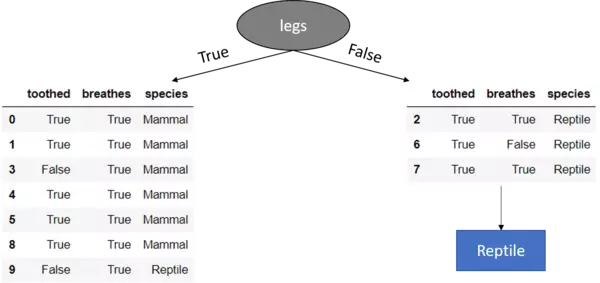

Vemos que para las piernas == Falso, los valores de características de destino del conjunto de datos restante son todos reptiles y, por lo tanto, establecemos esto como un nodo de hoja porque tenemos un conjunto de datos puro (dividir aún más el conjunto de datos en cualquiera de las dos características restantes no conduciría a un resultado diferente o más preciso ya que hagamos lo que hagamos después de este punto, la predicción seguirá siendo Reptil). Además, verá que los tramos de características ya no se incluyen en los conjuntos de datos restantes. Debido a que ya hemos usado esta característica (categórica) para dividir el conjunto de datos, no debe usarse más.

Hasta ahora hemos encontrado la función para el nodo raíz, así como un nodo hoja para las piernas == Falso. Ahora se deben realizar los mismos pasos para el cálculo de la ganancia de información también para el conjunto de datos restante para las piernas == Cierto, ya que aquí todavía tenemos una mezcla de diferentes valores de características objetivo. Por eso:

Cálculo de ganancia de información para las características dentadas y respiraciones para las piernas restantes del conjunto de datos == Verdadero:

Entropía del (nuevo) subconjunto de datos después de la primera división:

$ H(D) = -((\frac{6}{7}*log_2(\frac{6}{7}))+(\frac{1}{7}*log_2(\frac{1}{7}))) = 0.5917 $

toothed:

$ H(toothed) = \frac{5}{7}*-((1*log_2(1))+(0))+\frac{2}{7}*-((\frac{1}{2}*log_2(\frac{1}{2}))+(\frac{1}{2}*log_2(\frac{1}{2}))) = 0.285 $

$InfoGain(toothed) = 0.5917 - 0.285 = 0.3067 $

breathes:

$ H(breathes) = \frac{7}{7}*-((\frac{6}{7}*log_2(\frac{6}{7}))+(\frac{1}{7}*log_2(\frac{1}{7})))+0 = 0.5917 $

$InfoGain(breathes) = 0.5917 - 0.5917 = 0 $

El conjunto de datos para dentado == Falso todavía contiene una mezcla de diferentes valores de características de destino, por lo que procedemos a dividir en la última característica izquierda (== respiraciones)

Por lo tanto, el árbol completamente desarrollado se ve así:


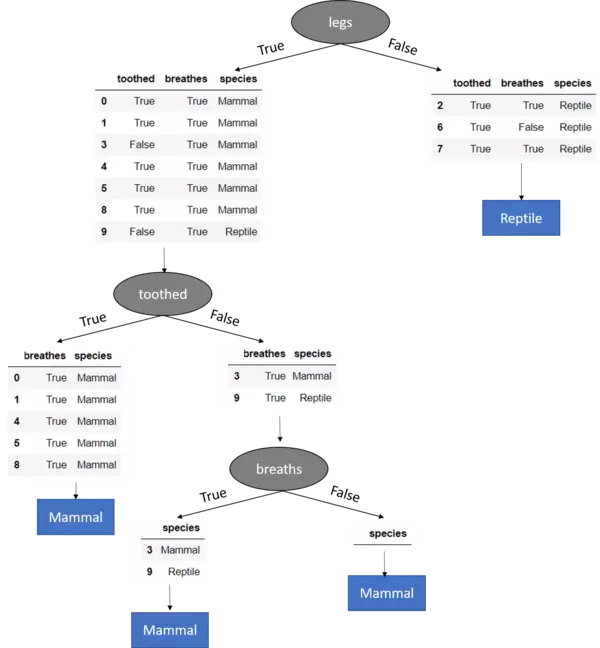

Tenga en cuenta la última división (nodo) donde el conjunto de datos se dividió en la función de respiración. Aquí, la función de respiraciones solo contiene datos donde respiraciones == Verdadero. Por lo tanto, para respira == Falso, no hay instancias en el conjunto de datos y, por lo tanto, no hay un subconjunto de datos que se pueda construir. En ese caso, devolvemos el valor de característica objetivo que ocurre con más frecuencia en el conjunto de datos original, que es Mamífero. Este es un ejemplo de cómo nuestro modelo de árbol generaliza detrás de los datos de entrenamiento.
Si consideramos la otra rama, que es respira == Verdadero, sabemos que después de dividir el conjunto de datos en los valores de una característica específica (respira {Verdadero, Falso}) en nuestro caso, la característica debe eliminarse. Bueno, eso conduce a un conjunto de datos en el que no hay más funciones disponibles para dividir aún más el conjunto de datos. Por lo tanto, dejamos de hacer crecer el árbol y devolvemos el valor de modo del nodo principal directo que es "Mamífero".

Eso nos lleva a la introducción del algoritmo ID3, que es un algoritmo popular para hacer crecer árboles de decisión, publicado por Ross Quinlan en 1986. Además del algoritmo ID3, también hay otros algoritmos populares como el C4.5, el C5.0 y el CART. algoritmo que no consideraremos más aquí. Antes de presentar el algoritmo ID3, volvamos rápidamente a los criterios de parada del árbol crecido anterior. Podemos definir un número casi arbitrariamente grande de criterios de parada. Supongamos, por ejemplo, que decimos que se permite que un árbol crezca durante solo 2 segundos y luego el proceso de crecimiento debería detenerse. Bueno, ese sería un criterio de detención. No obstante, hay principalmente tres casos útiles en los que detenemos el crecimiento del árbol suponiendo que no lo detenga de antemano definiendo, por ejemplo, una profundidad máxima del árbol o un valor mínimo de ganancia de información. Evitamos que el árbol crezca cuando

1. Todas las filas en la entidad de destino tienen el mismo valor
2. El conjunto de datos ya no se puede dividir porque no quedan más funciones
3. El conjunto de datos ya no se puede dividir porque no quedan más filas / No quedan datos

Por definición, decimos que si el crecimiento se detiene debido al criterio de detención dos, el nodo de hoja debe predecir el valor de característica de destino que ocurre con mayor frecuencia del nodo superior (padre). Si el crecimiento se detiene debido al tercer criterio de detención, asignamos al nodo de hoja el valor de la característica de destino del modo del conjunto de datos original.

Atención, ahora presentamos el algoritmo ID3:

El pseudocódigo para el algoritmo ID3 se basa en la ilustración de pseudocódigo de (Mitchell, 1997).

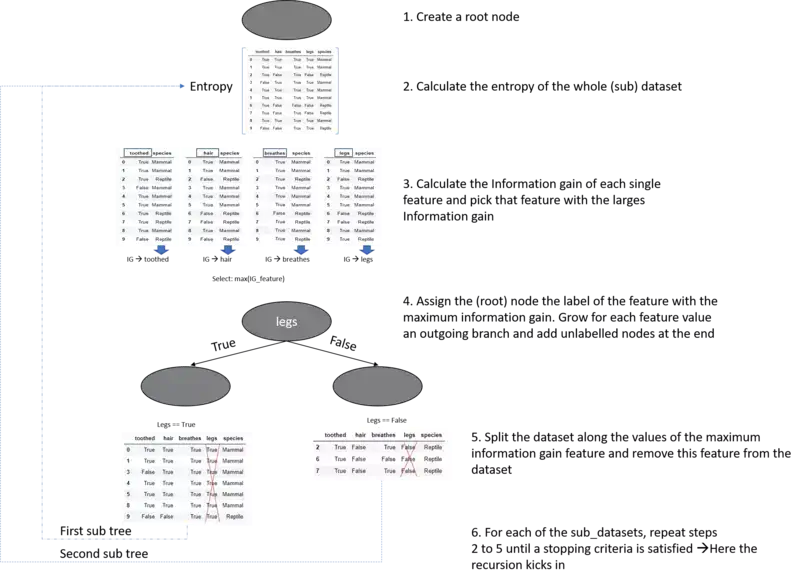

## Clasificación Árboles de decisión desde cero con Python

 
Como ahora conocemos los pasos principales del algoritmo ID3, comenzaremos a crear nuestro propio modelo de clasificación de árboles de decisión desde cero en Python.

Por lo tanto, utilizaremos todo el conjunto de datos del zoológico de la UCI.
https://archive.ics.uci.edu/ml/datasets/zoo

Este conjunto de datos consta de 101 filas y 17 atributos valorados categóricamente que definen si un animal tiene una propiedad específica o no (por ejemplo, pelos, plumas,...). 

El primer atributo representa el nombre del animal y será eliminado. La característica de destino consiste en 7 valores enteros [1 a 7] que representan 

1. Mamífero, 
2. Pájaro, 
3. Reptil, 
4. Pez, 
5. Anfibio, 
6. Insecto, 
7. Invertebrado

Sin embargo, antes de que finalmente comencemos a construir el árbol de decisiones, quiero señalar algunas cosas:
La intención del siguiente código no es crear una implementación altamente eficiente y robusta de un árbol de decisión ID3. Para este propósito, bright heads ha creado el modelo de árbol de decisión sklearn preempaquetado que usaremos en la siguiente sección.
Con el siguiente código, quiero proporcionar y mostrar el principio básico y los pasos detrás de la creación de un árbol de decisiones desde cero con el objetivo de que podamos usar los módulos preempaquetados de manera más eficiente porque entendemos y sabemos lo que están haciendo y eventualmente podemos construir nuestro propio modelo de aprendizaje automático.
Dicho esto, hay cuatro pasos importantes:

- El cálculo de la Ganancia de Información
- La llamada recursiva del TreeModel
- La construcción de la estructura de árbol real.
- La predicción de especies de una nueva instancia animal invisible

Aquí, los aspectos más críticos son la llamada recursiva del TreeModel, la creación del árbol en sí mismo (construir la estructura del árbol), así como la predicción de una instancia de consulta invisible (el proceso de recorrer el árbol para predecir la clase de una instancia invisible). instancia de consulta).



In [2]:
"""
Make the imports of python packages needed
"""
import pandas as pd
import numpy as np
from pprint import pprint

#Import the dataset and define the feature as well as the target datasets / columns#
dataset = pd.read_csv('zoo.data',
                      names=['animal_name','hair','feathers','eggs','milk',
                             'airbone','aquatic','predator','toothed','backbone',
                             'breathes','venomous','fins','legs','tail',
                             'domestic','catsize','class',])#Import all columns omitting the fist which consists the names of the animals

#We drop the animal names since this is not a good feature to split the data on
dataset=dataset.drop('animal_name',axis=1)
###################

def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
################### 
###################

def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    ##Calculate the entropy of the dataset
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
       
###################
###################
def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    """
    ID3 Algorithm: This function takes five paramters:
    1. data = the data for which the ID3 algorithm should be run --> In the first run this equals the total dataset
    2. originaldata = This is the original dataset needed to calculate the mode target feature value of the original dataset
    in the case the dataset delivered by the first parameter is empty
    3. features = the feature space of the dataset . This is needed for the recursive call since during the tree growing process
    we have to remove features from our dataset --> Splitting at each node
    4. target_attribute_name = the name of the target attribute
    5. parent_node_class = This is the value or class of the mode target feature value of the parent node for a specific node. This is 
    also needed for the recursive call since if the splitting leads to a situation that there are no more features left in the feature
    space, we want to return the mode target feature value of the direct parent node.
    """   
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    #If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    #If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    #If the feature space is empty, return the mode target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the ID3 algorithm and hence
    #the mode target feature value is stored in the parent_node_class variable.
    elif len(features) ==0:
        return parent_node_class
    #If none of the above holds true, grow the tree!
    else:
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        #Select the feature which best splits the dataset
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        tree = {best_feature:{}}
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        #Grow a branch under the root node for each possible value of the root node feature
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the ID3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return(tree)    
                
###################
###################
    
def predict(query,tree,default = 1):
    """
    Prediction of a new/unseen query instance. This takes two parameters:
    1. The query instance as a dictionary of the shape {"feature_name":feature_value,...}
    2. The tree 
    We do this also in a recursive manner. That is, we wander down the tree and check if we have reached a leaf or if we are still in a sub tree. 
    Since this is a important step to understand, the single steps are extensively commented below.
    1.Check for every feature in the query instance if this feature is existing in the tree.keys() for the first call, 
    tree.keys() only contains the value for the root node 
    --> if this value is not existing, we can not make a prediction and have to 
    return the default value which is the majority value of the target feature
    2. First of all we have to take care of a important fact: Since we train our model with a database A and then show our model
    a unseen query it may happen that the feature values of these query are not existing in our tree model because non of the
    training instances has had such a value for this specific feature. 
    For instance imagine the situation where your model has only seen animals with one to four
    legs - The "legs" node in your model will only have four outgoing branches (from one to four). If you now show your model
    a new instance (animal) which has for the legs feature the vale 5, you have to tell your model what to do in such a 
    situation because otherwise there is no classification possible because in the classification step you try to 
    run down the outgoing branch with the value 5 but there is no such a branch. Hence: Error and no Classification!
    We can address this issue with a classification value of for instance (999) which tells us that there is no classification
    possible or we assign the most frequent target feature value of our dataset used to train the model. Or, in for instance 
    medical application we can return the most worse case - just to make sure... 
    We can also return the most frequent value of the direct parent node. To make a long story short, we have to tell the model 
    what to do in this situation.
    In our example, since we are dealing with animal species where a false classification is not that critical, we will assign
    the value 1 which is the value for the mammal species (for convenience).

    3. Address the key in the tree which fits the value for key --> Note that key == the features in the query. 
    Because we want the tree to predict the value which is hidden under the key value (imagine you have a drawn tree model on 
    the table in front of you and you have a query instance for which you want to predict the target feature 
    - What are you doing? - Correct:
    You start at the root node and wander down the tree comparing your query to the node values. Hence you want to have the
    value which is hidden under the current node. If this is a leaf, perfect, otherwise you wander the tree deeper until you
    get to a leaf node. 
    Though, you want to have this "something" [either leaf or sub_tree] which is hidden under the current node
    and hence we must address the node in the tree which == the key value from our query instance. 
    This is done with tree[keys]. Next you want to run down the branch of this node which is equal to the value given "behind"
    the key value of your query instance e.g. if you find "legs" == to tree.keys() that is, for the first run == the root node.
    You want to run deeper and therefore you have to address the branch at your node whose value is == to the value behind key.
    This is done with query[key] e.g. query[key] == query['legs'] == 0 --> Therewith we run down the branch of the node with the
    value 0. Summarized, in this step we want to address the node which is hidden behind a specific branch of the root node (in the first run)
    this is done with: result = [key][query[key]]

    4. As said in the 2. step, we run down the tree along nodes and branches until we get to a leaf node.
    That is, if result = tree[key][query[key]] returns another tree object (we have represented this by a dict object --> 
    that is if result is a dict object) we know that we have not arrived at a root node and have to run deeper the tree. 
    Okay... Look at your drawn tree in front of you... what are you doing?...well, you run down the next branch... 
    exactly as we have done it above with the slight difference that we already have passed a node and therewith 
    have to run only a fraction of the tree --> You clever guy! That "fraction of the tree" is exactly what we have stored
    under 'result'.
    So we simply call our predict method using the same query instance (we do not have to drop any features from the query
    instance since for instance the feature for the root node will not be available in any of the deeper sub_trees and hence 
    we will simply not find that feature) as well as the "reduced / sub_tree" stored in result.

    SUMMARIZED: If we have a query instance consisting of values for features, we take this features and check if the 
    name of the root node is equal to one of the query features.
    If this is true, we run down the root node outgoing branch whose value equals the value of query feature == the root node.
    If we find at the end of this branch a leaf node (not a dict object) we return this value (this is our prediction).
    If we instead find another node (== sub_tree == dict objct) we search in our query for the feature which equals the value 
    of that node. Next we look up the value of our query feature and run down the branch whose value is equal to the 
    query[key] == query feature value. And as you can see this is exactly the recursion we talked about
    with the important fact that for each node we run down the tree, we check only the nodes and branches which are 
    below this node and do not run the whole tree beginning at the root node 
    --> This is why we re-call the classification function with 'result'
    """
    #1.
    for key in list(query.keys()):
        if key in list(tree.keys()):
            #2.
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            #3.
            result = tree[key][query[key]]
            #4.
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

"""
Check the accuracy of our prediction.
The train_test_split function takes the dataset as parameter which should be divided into
a training and a testing set. The test function takes two parameters, which are the testing data as well as the tree model.
"""
###################
###################
def train_test_split(dataset):
    training_data = dataset.iloc[:80].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[80:].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 

def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = pd.DataFrame(columns=["predicted"]) 
    #Calculate the prediction accuracy
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["class"])/len(data))*100,'%')

"""
Train the tree, Print the tree and predict the accuracy
"""
tree = ID3(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'legs': {0: {'fins': {0.0: {'toothed': {0.0: 7.0, 1.0: 3.0}},
                       1.0: {'eggs': {0.0: 1.0, 1.0: 4.0}}}},
          2: {'hair': {0.0: 2.0, 1.0: 1.0}},
          4: {'hair': {0.0: {'toothed': {0.0: 7.0, 1.0: 5.0}}, 1.0: 1.0}},
          6: {'aquatic': {0.0: 6.0, 1.0: 7.0}},
          8: 7.0}}
The prediction accuracy is:  85.71428571428571 %


Como podemos ver, la precisión de la predicción para el conjunto de datos del zoológico es de alrededor del 86 %, lo que en realidad no es tan malo si se tiene en cuenta que no hemos realizado ninguna mejora como, por ejemplo, definir un tamaño de división mínimo o una cantidad mínima de instancias por hoja o embolsado. o potenciación, o poda, etc.

## Desicion Tree usando sklearn

Incluso si el código anterior es adecuado e importante para transmitir los conceptos de árboles de decisión y cómo implementar un modelo de árbol de clasificación "desde cero", hay un modelo de clasificación de árbol de decisión muy poderoso implementado en sklearn sklearn.tree.DecisionTreeClassifier. 

Gracias a este modelo podemos implementar un modelo de árbol más rápido, más eficiente y también más ordenado ya que podemos hacerlo en tan solo unas pocas líneas de código. Los pasos para usar el árbol de decisión de clasificación de sklearn siguen la API principal de sklearn, que son:

- Elija el modelo que desea usar --> el DecisionTreeClassifier
- Establecer los hiperparámetros del modelo --> E.g. número de muestras mínimas por hoja
- Cree un conjunto de datos de características, así como una matriz de destino que contenga las etiquetas para las instancias.
- Ajustar el modelo a los datos de entrenamiento
- Utilice el modelo ajustado en datos no vistos.


In [5]:
"""
Import the DecisionTreeClassifier model.
"""
#Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
###########################################################################################################
##########################################################################################################
"""
Import the Zoo Dataset
"""
#Import the dataset 
dataset = pd.read_csv('zoo.data',names=['animal_name','hair','feathers','eggs','milk',
                             'airbone','aquatic','predator','toothed','backbone',
                             'breathes','venomous','fins','legs','tail',
                             'domestic','catsize','class',])
#We drop the animal names since this is not a good feature to split the data on
dataset=dataset.drop('animal_name',axis=1)
###########################################################################################################
##########################################################################################################
"""
Split the data into a training and a testing set
"""
train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]
###########################################################################################################
##########################################################################################################
"""
Train the model
"""
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)
###########################################################################################################
##########################################################################################################
"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(test_features)
###########################################################################################################
##########################################################################################################
"""
Check the accuracy
"""
print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")

The prediction accuracy is:  80.95238095238095 %


## Ventajas y desventajas de los árboles de decisión

Como ya hemos visto cómo se programa un modelo de clasificación de árboles de decisión en Python a mano y utilizando un modelo sklearn preempaquetado, consideraremos las principales ventajas y desventajas de los árboles de decisión en general, es decir, no solo de los árboles de decisión de clasificación.

### Ventajas
- Caja blanca, modelo fácil de interpretar
- No se necesita normalización de características
- Los modelos de árbol pueden manejar datos continuos y categóricos (árboles de clasificación y regresión)
- Puede modelar relaciones no lineales
- Puede modelar interacciones entre las diferentes características descriptivas.

### Desventajas
Si se utilizan características continuas, el árbol puede volverse bastante grande y, por lo tanto, menos interpretable.
Los árboles de decisión son propensos a sobreajustar los datos de entrenamiento y, por lo tanto, no generalizan bien los datos si no se implementan criterios de detención o mejoras como poda, impulso o embolsado.

Pequeños cambios en los datos pueden conducir a un árbol completamente diferente. Este problema se puede abordar mediante el uso de métodos de conjunto como embolsado, impulso o bosques aleatorios.

Los conjuntos de datos desequilibrados donde algunos valores de características de destino ocurren con mucha más frecuencia que otros pueden generar árboles sesgados, ya que los valores de características que ocurren con frecuencia son preferibles a los que ocurren con menos frecuencia. Facilitado: en general, hay tres casos por los que queremos hacer crecer un nodo de hoja: si solo hay valores de características de destino puros en un sub_conjunto --> Devolvemos este valor; Si el sub_conjunto de datos está vacío --> Devolvemos el valor de modo del conjunto de datos original; Si no quedan características en el sub_conjunto de datos --> Devolvemos el valor de modo del nodo principal. Si ahora tenemos un valor de característica objetivo cuya frecuencia supera a todas las demás frecuencias, está claro por qué el resultado puede estar sesgado hacia este valor. Podemos abordar esto asegurándonos de que el conjunto de datos esté relativamente equilibrado en términos de los valores de características objetivo.

Si la cantidad de características es relativamente grande (altamente dimensional) y la cantidad de instancias es relativamente baja, el árbol podría sobreajustarse a los datos.

Las características con muchos niveles pueden preferirse a las características con menos niveles, ya que para ellas es "más fácil" dividir el conjunto de datos de modo que los sub_conjuntos de datos solo contengan valores de características objetivo puros. Este problema se puede abordar prefiriendo, por ejemplo, la relación de ganancia de información como criterio de división sobre la ganancia de información.

Cuando ilustramos el proceso de división de características de destino, vemos que el modelo de árbol clasifica las clases de características de destino en regiones rectangulares. Por lo tanto, el modelo de árbol asume que los datos subyacentes se pueden dividir respectivamente representados por estas regiones rectangulares.

## Más problemas y variaciones

Lo primero que no se ha mostrado anteriormente es cómo hacer crecer un árbol cuando las características descriptivas no se escalan de forma categórica sino continua.
Esto no cambia mucho con respecto al enfoque anterior, con la gran diferencia de que podemos usar una función de escala continua varias veces durante el crecimiento del árbol y tenemos que usar la media o la moda de una función con respecto a los valores de la función de destino en lugar de los valores de características individuales (categóricos) --> Estos ya no se pueden usar ya que ahora hay un número infinito de diferentes valores posibles.

La segunda variación importante es cuando ya no tenemos una característica de destino escalada categóricamente sino escalada continuamente. Si este es el caso, llamamos al modelo de árbol modelo de árbol de regresión en lugar de modelo de árbol de clasificación. Aquí, como ejemplo, podemos usar la varianza de una función con respecto a la función de destino como criterio de división en lugar de la ganancia de información. Luego usamos la función con la varianza ponderada más baja como función de división.

Dijimos anteriormente que los árboles de decisión son propensos a sobreajustar los datos de entrenamiento. También mencionamos que este problema se puede abordar mediante un método llamado poda. Y es exactamente lo que parece. Podamos el árbol. Por lo tanto, comenzamos en los nodos de hoja y simplemente verificamos si la precisión aumenta si podamos las hojas y reemplazamos el nodo principal de estas hojas por un nodo de hoja que representa el valor de la característica objetivo del modo para este nodo. Siguiendo este procedimiento, deambulamos por el árbol hasta que la poda no conduzca a una mayor precisión o hasta que la poda no reduzca la precisión. Para resumir, si la poda no reduce la precisión, pode. Hecho. Hemos encontrado el árbol que da como resultado la máxima precisión con respecto a nuestro conjunto de datos de prueba.

Dibujo

Otro enfoque para aumentar la precisión de un modelo de árbol es utilizar un enfoque de conjunto. Con un enfoque de conjunto, creamos árboles de diferentes modelos (en este caso) a partir del conjunto de datos original y dejamos que los diferentes modelos voten por mayoría en el conjunto de datos de prueba. Es decir, predecimos los valores objetivo para el conjunto de datos de prueba usando cada uno de los modelos creados y luego devolvemos este valor de característica objetivo que ha sido predicho por la mayoría de los modelos. Los enfoques más destacados para crear modelos de conjuntos de árboles de decisión se denominan bagging y boosting. Una variante de un modelo de conjunto de árbol de decisión basado en impulso se denomina modelo de bosque aleatorio, que es uno de los algoritmos de aprendizaje automático más potentes. Los modelos de conjunto también se pueden crear utilizando diferentes criterios de división para los modelos individuales, como el índice de Gini y la relación de ganancia de información.

Ahora hemos visto muchas variaciones y diferentes enfoques para los modelos de árboles de decisión. Sin embargo, no existe una guía general sobre qué enfoque se debe utilizar. -No hay almuerzo gratis- Con frecuencia, depende de... y el único consejo real que se puede dar es que debe probar diferentes modelos con diferentes hiperparámetros para encontrar el modelo que mejor se ajuste a un problema específico. Sin embargo, los modelos de conjuntos como el algoritmo de bosque aleatorio han demostrado ser modelos muy potentes.

En los siguientes capítulos abordaremos algunas de las variaciones mencionadas anteriormente para obtener una comprensión más profunda de los árboles de decisión.

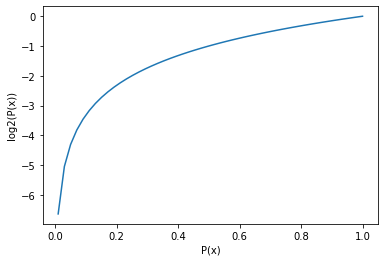

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(np.linspace(0.01,1),np.log2(np.linspace(0.01,1)))
ax.set_xlabel("P(x)")
ax.set_ylabel("log2(P(x))")

plt.show()

### Otras fuentes:

https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html

https://www.iartificial.net/arboles-de-decision-con-ejemplos-en-python/

https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

